In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                  '/housing/housing.data',header=None,sep="\s+")

In [3]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


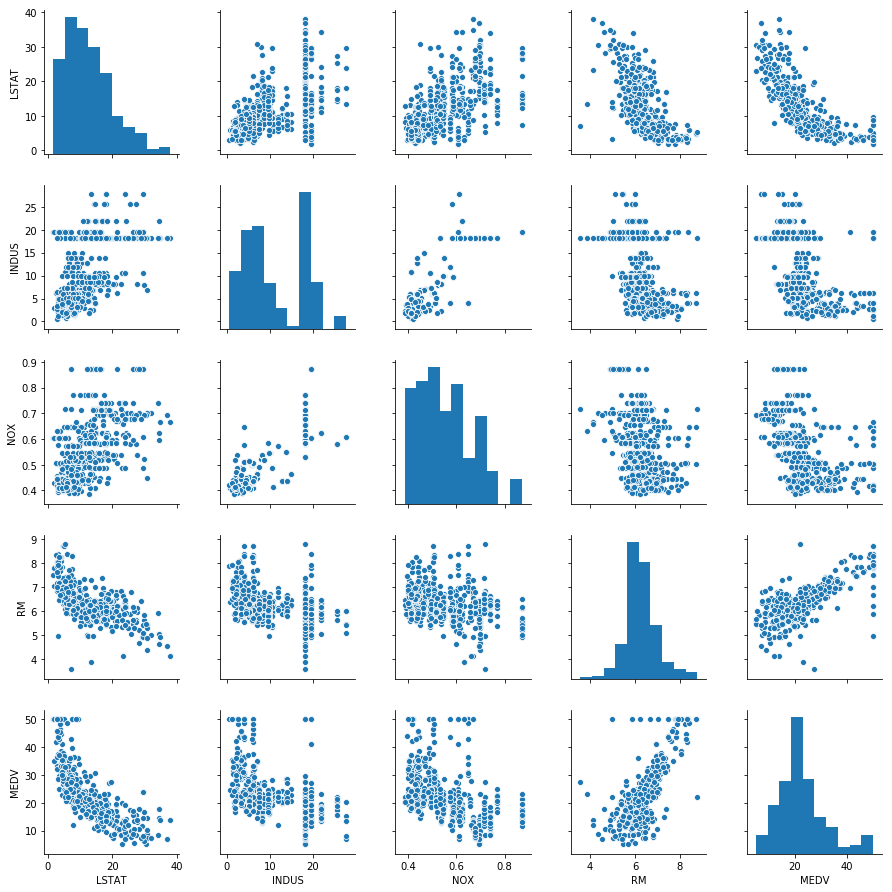

In [5]:
cols = ["LSTAT","INDUS","NOX","RM","MEDV"]
#変数のペアの関係をプロット、:dfはDataframeオブジェクト、sizeは１面のインチサイズ
sns.pairplot(df[cols],size=2.5)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

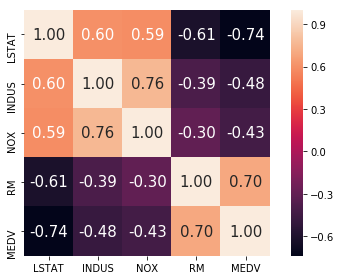

In [15]:
cm = np.corrcoef(df[cols].values.T)         #ピアソンの積率相関係数を計算
hm = sns.heatmap(cm,                        #第1引数の相関係数をもとにヒートマップを作成
                cbar=True,                 #カラーバーの表示
                annot=True,                #データ値の表示
                square=True,               #各矩形の正方化(縦と横のサイズを一致させる)
                fmt=".2f",                  #数値などの表示形式
                annot_kws={"size":15},      #データの値のサイズの設定
                yticklabels=cols,           #行のメモリのラベル名
                xticklabels=cols)           #列のメモリのラベル名
plt.tight_layout()
plt.show()

In [16]:
class LinearRegressionGD(object):
    def __init__(self,eta=0.001,n_iter=20):
        self.eta=eta
        self.n_iter=n_iter
        
    #トレーニングを実行するfit
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1])  #重みを初期化
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    #総入力を計算するnet_input
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    #予測値を入力するpredict
    def predict(self,X):
        return self.net_input(X)

In [20]:
X = df[["RM"]].values
y = df["MEDV"].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std,y_std)

In [26]:
df[["RM"]].values.shape

(506, 1)

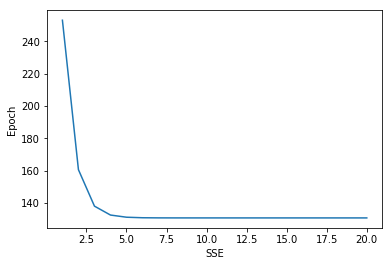

In [27]:
#エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.xlabel("SSE")
plt.ylabel("Epoch")
plt.show()

In [28]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c="steelblue",edgecolors="white",s=70)
    plt.plot(X,model.predict(X),color="black",lw=2)
    return

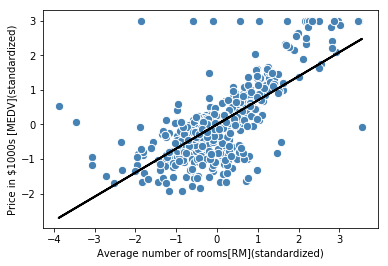

In [29]:
lin_regplot(X_std,y_std,lr)
plt.xlabel("Average number of rooms[RM](standardized)")
plt.ylabel("Price in $1000s [MEDV](standardized)")
plt.show()

In [31]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f"% sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


In [32]:
print("Slope: %.3f"%lr.w_[1])
print("Intercept: %.3f"% lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X)
print("Slope: %.3f"%slr.coef_[0])
print("Intercept: %.3f"% slr.intercept_)

Slope: 9.102
Intercept: -34.671


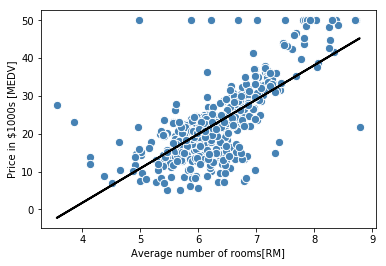

In [35]:
lin_regplot(X,y,slr)
plt.xlabel("Average number of rooms[RM]")
plt.ylabel("Price in $1000s [MEDV]")
plt.show()

In [38]:
from sklearn.linear_model import RANSACRegressor
#ロバスト回帰モデルのクラスをインスタンス化
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss = "absolute_loss",
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

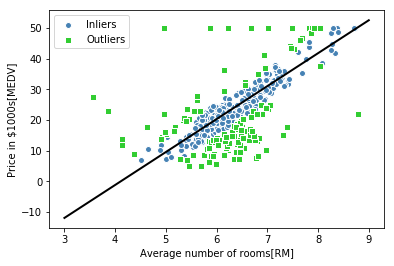

In [40]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])
#正常値をプロット
plt.scatter(X[inlier_mask],y[inlier_mask],c="steelblue",edgecolor="white",marker="o",label="Inliers")
#外れ値をプロット
plt.scatter(X[outlier_mask],y[outlier_mask],c="limegreen",edgecolor="white",marker="s",label="Outliers")
#予測値をプロット
plt.plot(line_X,line_y_ransac,color="black",lw=2)
plt.xlabel("Average number of rooms[RM]")
plt.ylabel("Price in $1000s[MEDV]")
plt.legend(loc="upper left")
plt.show()

In [42]:
print("Slope: %.3f"%ransac.estimator_.coef_[0])

Slope: 10.735


In [43]:
print("Intercept: %.3f"%ransac.estimator_.intercept_)

Intercept: -44.089


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df.iloc[:,:-1].values
y = df["MEDV"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

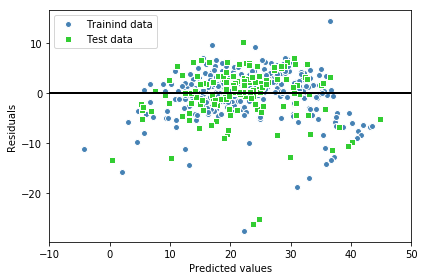

In [46]:
plt.scatter(y_train_pred,y_train_pred-y_train,
           c="steelblue",marker="o",edgecolor="white",label="Trainind data")
plt.scatter(y_test_pred,y_test_pred-y_test,
           c="limegreen",marker="s",edgecolor="white",label="Test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=-10,xmax=50,color="black",lw=2)
plt.xlim([-10,50])
plt.tight_layout()
plt.show()ん

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
#平均二乗誤差を出力
print("MSE train: %.3f,test: %.3f"%(mean_squared_error(y_train,y_train_pred),
                                   mean_squared_error(y_test,y_test_pred)))

MSE train: 19.958,test: 27.196


In [49]:
#R^2（決定係数）のスコアを出力
from sklearn.metrics import r2_score

In [50]:
print("R^2 train: %.3f,test: %.3f"%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train: 0.765,test: 0.673


In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) #L2ペナルティ項の影響度合いを表す値を引数に指定
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0,l1_ratio=0.5)

In [52]:
#多項式の２次の項を追加する
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:,np.newaxis]
y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])
#線形回帰（最小二乗法）モデルのクラスをインスタンス化
lr = LinearRegression()
pr = LinearRegression()
#2次の多項式特徴量のクラスをインスタンス化
quadratic = PolynomialFeatures(degree=2)
#データに適合させ、データを変換
X_quad = quadratic.fit_transform(X)

In [53]:
#比較を可能にするために単回帰モデルを学習させる
#データに適合させる
lr.fit(X,y)
#np.newaxisで列ベクトルにする
X_fit = np.arange(250,600,10)[:,np.newaxis]
#予測値を計算
y_lin_fit = lr.predict(X_fit)

In [55]:
#多項式回帰のために、変換された特徴量で重回帰モデルを学習させる
#データに適合させる
pr.fit(X_quad,y)
#2次式でyの値を計算
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

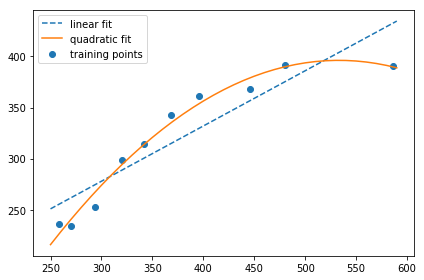

In [58]:
#散布図、線形回帰モデル、多項式回帰モデルの結果をプロット
plt.scatter(X,y,label="training points")
plt.plot(X_fit,y_lin_fit,label="linear fit",linestyle="--")
plt.plot(X_fit,y_quad_fit,label="quadratic fit")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [59]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print("Training MSE linear: %.3f,quadratic: %.3f"%(mean_squared_error(y,y_lin_pred),
                                                  mean_squared_error(y,y_quad_pred)))
print("Training R^2 linear: %.3f,quadratic :%.3f"%(r2_score(y,y_lin_pred),r2_score(y,y_quad_pred)))

Training MSE linear: 569.780,quadratic: 61.330
Training R^2 linear: 0.832,quadratic :0.982


In [60]:
X = df[["LSTAT"]].values
y = df["MEDV"].values
regr = LinearRegression()

In [61]:
#2次と３次の特徴量を生成
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [62]:
#特徴量の学習、予測、決定係数の計算
X_fit = np.arange(X.min(),X.max(),1)[:,np.newaxis]
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

In [69]:
#２次の特徴量の学習、予測、決定係数の計算
regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

In [70]:
#3次の特徴量の学習、予測、決定係数の計算
regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

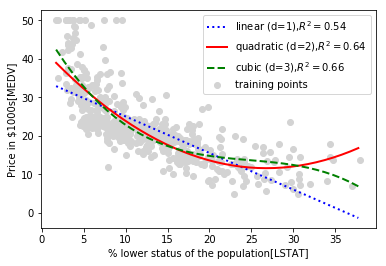

In [77]:
#各モデルの結果をプロット
plt.scatter(X,y,label="training points",color="lightgray")
plt.plot(X_fit,y_lin_fit,label="linear (d=1),$R^2=%.2f$"%linear_r2,color="blue",lw=2,linestyle=":")
plt.plot(X_fit,y_quad_fit,label="quadratic (d=2),$R^2=%.2f$"%quadratic_r2,color="red",lw=2,linestyle="-")
plt.plot(X_fit,y_cubic_fit,label="cubic (d=3),$R^2=%.2f$"%cubic_r2,color="green",lw=2,linestyle="--")
plt.xlabel("% lower status of the population[LSTAT]")
plt.ylabel("Price in $1000s[MEDV]")
plt.legend(loc="upper right")
plt.show()

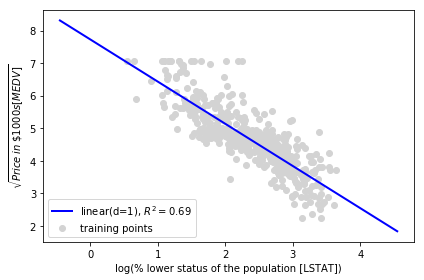

In [79]:
#特徴量を変換
X_log = np.log(X)
y_sqrt = np.sqrt(y)

#特徴量の学習、予測、決定係数の計算
X_fit = np.arange(X_log.min()-1,X_log.max()+1,1)[:,np.newaxis]
regr = regr.fit(X_log,y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt,regr.predict(X_log))

#射影したデータを使った学習結果をプロット
plt.scatter(X_log,y_sqrt,label="training points",color="lightgray")
plt.plot(X_fit,y_lin_fit,label="linear(d=1), $R^2=%.2f$"%linear_r2,color="blue",lw=2)
plt.xlabel("log(% lower status of the population [LSTAT])")
plt.ylabel("$\sqrt{Price \; in \; \$1000s [MEDV]}$")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [82]:
from sklearn.tree import DecisionTreeRegressor

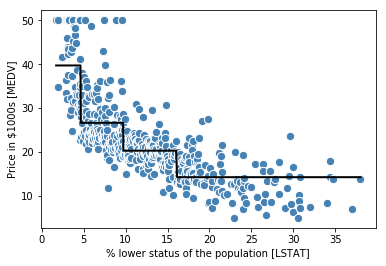

In [87]:
X = df[["LSTAT"]].values
y = df["MEDV"].values
#決定木回帰モデルのクラスをインスタンス化：max_depthで決定木の深さを指定
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X,y)
#argsortはソート後のインデックスを返し、flattenは1次元の配列を返す
sort_idx = X.flatten().argsort()
#lin_regplot関数により、散布図と回帰直線を作成
lin_regplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel("% lower status of the population [LSTAT]")
plt.ylabel("Price in $1000s [MEDV]")
plt.show()

In [90]:
X = df.iloc[:,:-1].values
y = df["MEDV"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
#ランダムフォレスト回帰のクラスをインスタンス化
forest = RandomForestRegressor(n_estimators=1000,
                              criterion = "mse",
                              random_state=1,
                              n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [93]:
y_train_pred=forest.predict(X_train)
y_test_pred =forest.predict(X_test)
#MSE(平均二乗誤差出力)
print("MSE train: %.3f,test;%.3f"%(mean_squared_error(y_train,y_train_pred),
                                  mean_squared_error(y_test,y_test_pred)))
#R^2（決定係数）出力
print("R^2 train: %.3f,test;%.3f"%(r2_score(y_train,y_train_pred),
                                  r2_score(y_test,y_test_pred)))

MSE train: 1.641,test;11.056
R^2 train: 0.979,test;0.878


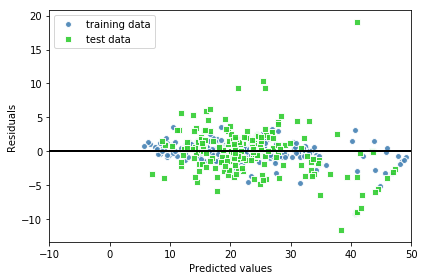

In [94]:
#予測値と残差をプロット
plt.scatter(y_train_pred,y_train_pred-y_train,
           c="steelblue",edgecolor="white",
           marker="o",s=35,alpha=0.9,label="training data")
plt.scatter(y_test_pred,y_test_pred-y_test,
           c="limegreen",edgecolor="white",
           marker="s",s=35,alpha=0.9,label="test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color="black")
plt.xlim([-10,50])
plt.tight_layout()
plt.show()